# importing the dependencies(libraries)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
#from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

#  data collection and analysis

In [2]:
#loading data from csv file to a pandas dataframe
df=pd.read_csv('insurance.csv')


In [3]:
#first 5 rows of the dataframe
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#info regarding datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# number of rows and columns
df.shape

(1338, 7)

In [6]:
# checking for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#  data analysis

In [7]:
#statistical measures of dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 432x288 with 0 Axes>

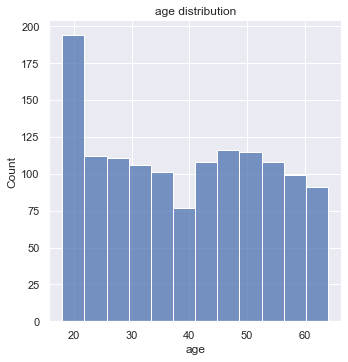

In [8]:
#distribution of age values
sns.set()
mp.figure()
sns.displot(df['age'])
mp.title('age distribution')
mp.show()

C:\Users\sushm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


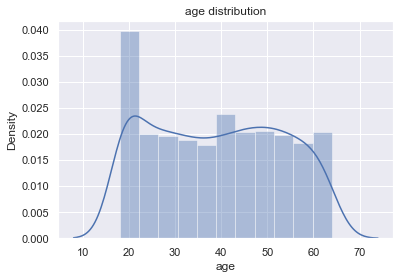

In [9]:
#distribution of age values
sns.set()
mp.figure()
sns.distplot(df['age'])
mp.title('age distribution')
mp.show()

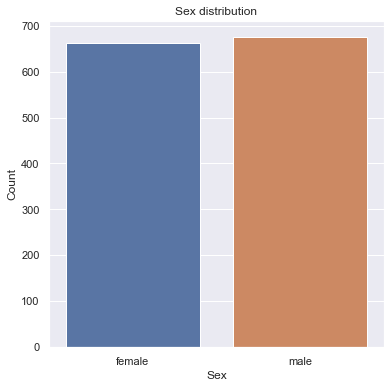

In [10]:
#distribution of sex values
mp.figure(figsize=(6,6))
sns.countplot(x='sex',data=df)
mp.title('Sex distribution')
mp.xlabel('Sex')
mp.ylabel('Count')
mp.show()

In [11]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<Figure size 432x288 with 0 Axes>

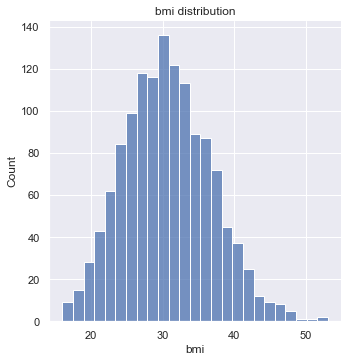

In [12]:
#distribution of bmi values
sns.set()
mp.figure()
sns.displot(df['bmi'])
mp.title('bmi distribution')
mp.show()

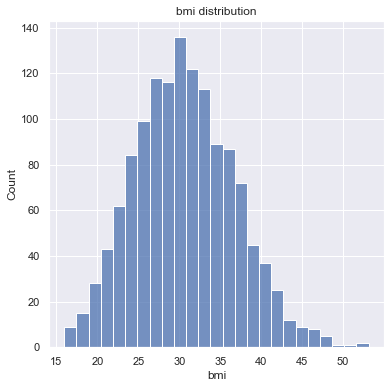

In [13]:
sns.set()
mp.figure(figsize=(6,6))
sns.histplot(df['bmi'])
mp.title('bmi distribution')
mp.show()

C:\Users\sushm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


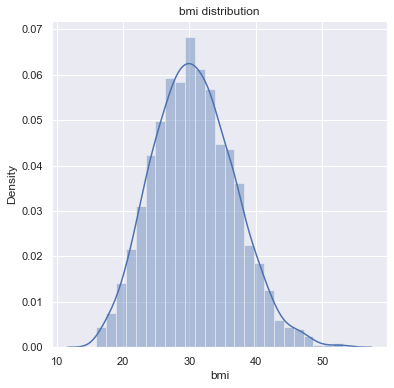

In [14]:
sns.set()
mp.figure(figsize=(6,6))
sns.distplot(df['bmi'])
mp.title('bmi distribution')
mp.show()

normal bmi-> 18.5 to 24.9

<function matplotlib.pyplot.show(close=None, block=None)>

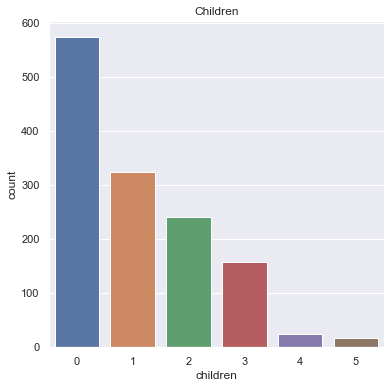

In [15]:
mp.figure(figsize=(6,6))
sns.countplot(x='children',data=df)
mp.title('Children')
mp.show

In [16]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

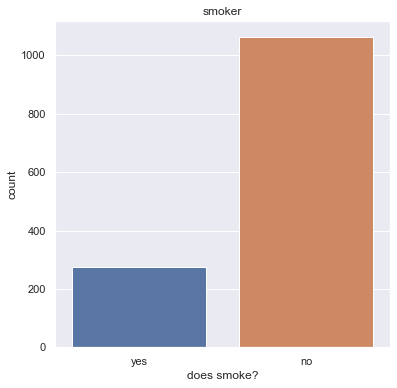

In [17]:
mp.figure(figsize=(6,6))
sns.countplot(x='smoker',data=df)
mp.title('smoker')
mp.xlabel('does smoke?')
mp.show()

In [18]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

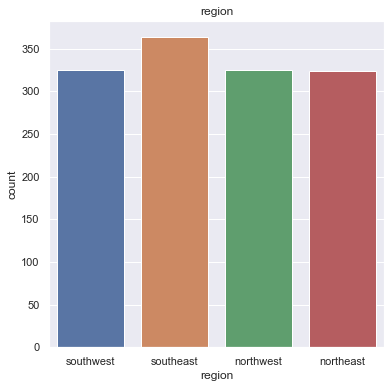

In [19]:
mp.figure(figsize=(6,6))
sns.countplot(x='region',data=df)
mp.title('region')
mp.xlabel('region')
mp.show()

C:\Users\sushm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


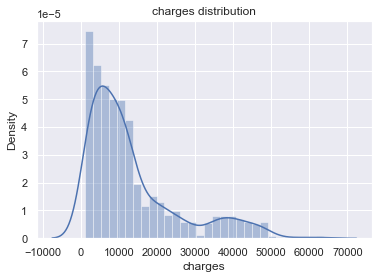

In [20]:
sns.set()
mp.figure()
sns.distplot(df['charges'])
mp.title('charges distribution')
mp.show()

#  checking the correlation between feature attributes

In [21]:
df['sex'] = pd.factorize(df['sex'])[0] + 1
df['region'] = pd.factorize(df['region'])[0] + 1
df['smoker'] = pd.factorize(df['smoker'])[0] + 1
corr = df.corr()
corr['charges'].sort_values(ascending=False)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region      0.006208
smoker     -0.787251
Name: charges, dtype: float64

#  correlation plot

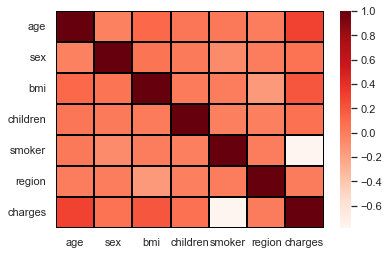

In [22]:
fig= mp.figure(figsize = (6, 4))
data_ploting = df.corr(method= 'pearson')
sns.heatmap(data_ploting, cmap='Reds', linecolor='black', linewidths= 2 )
mp.show()

# pair plot

<Figure size 432x288 with 0 Axes>

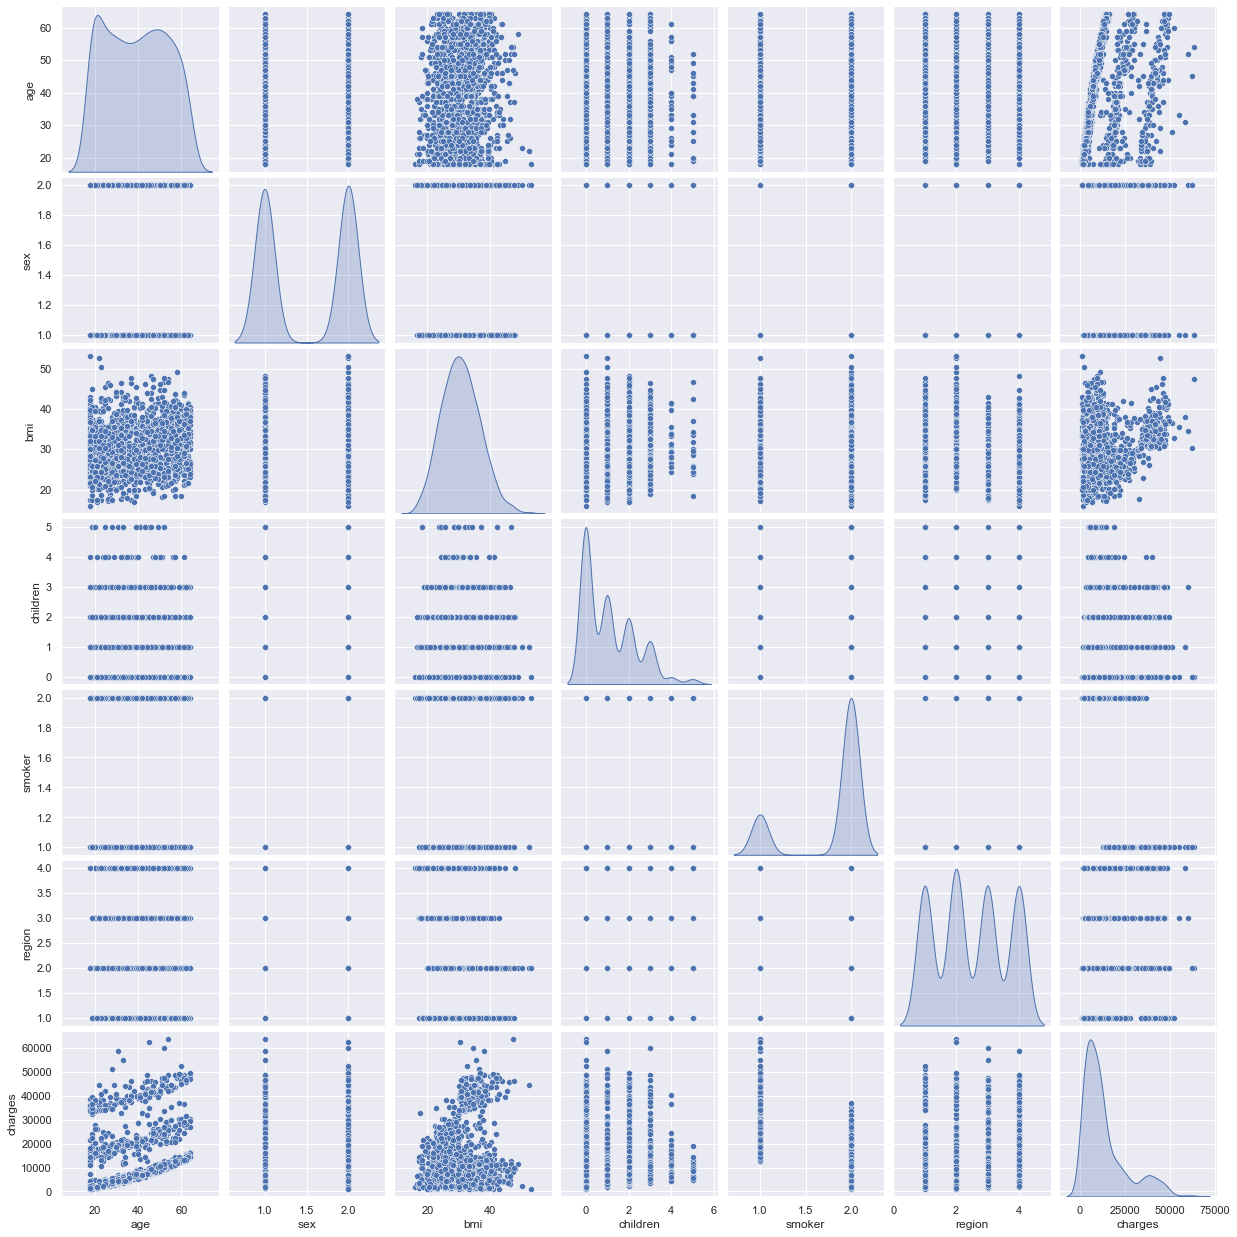

In [23]:
fig= mp.figure(figsize = (6, 4))
sns.pairplot(df,diag_kind='kde');

#  data preprocessing

In [24]:
#encoding the catagorical features i.e.sex,region,smoker

#encoding the sex column
df.replace({'sex':{'male':0,'female':1}},inplace=True)

#encoding the smoker column
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)

#encoding the region column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)


In [25]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,2,33.770,1,2,2,1725.55230
2,28,2,33.000,3,2,2,4449.46200
3,33,2,22.705,0,2,3,21984.47061
4,32,2,28.880,0,2,3,3866.85520


# splitting the features and target

In [26]:
x=df.drop(columns='charges',axis=1)
y=df['charges']

In [27]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,2,33.770,1,2,2
2,28,2,33.000,3,2,2
3,33,2,22.705,0,2,3
4,32,2,28.880,0,2,3
...,...,...,...,...,...,...
1333,50,2,30.970,3,2,3
1334,18,1,31.920,0,2,4
1335,18,1,36.850,0,2,2
1336,21,1,25.800,0,2,1


In [28]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [29]:
#splitting the data into training data and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=2)

In [30]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


#  model training

# 1.linear regression

In [31]:
regressor=LinearRegression()

In [32]:
regressor.fit(x_train,y_train)

LinearRegression()

In [33]:
#prediction on training data
training_data_prediction=regressor.predict(x_train)

In [34]:
print('Coefficients: \n', regressor.coef_)
print('Intercept: \n', regressor.intercept_)

Coefficients: 
 [   251.36689613    -35.4338166     330.76133485    589.05862101
 -23905.96516848    323.62760276]
Intercept: 
 34805.38657042288


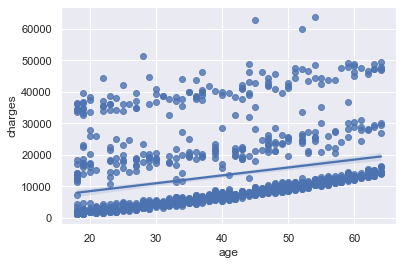

In [35]:
sns.set(color_codes=True)

dataframe_training = pd.DataFrame()
dataframe_training['age'] = x_train['age']

dataframe_training['charges'] = y_train

ax = sns.regplot(x="age", y="charges", data= dataframe_training)

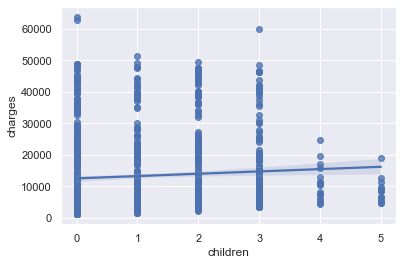

In [36]:
sns.set(color_codes=True)

dataframe_training = pd.DataFrame()
dataframe_training['children'] = x_train['children']

dataframe_training['charges'] = y_train

ax = sns.regplot(x="children", y="charges", data= dataframe_training)

In [37]:
#r squared value on training data
r2_train=metrics.r2_score(y_train,training_data_prediction)
print('r squared value:',r2_train)

r squared value: 0.7519923667088932


In [38]:
#prediction on testing data
test_data_prediction=regressor.predict(x_test)

In [39]:
y_pred=regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred)
MAE_gradient= metrics.mean_absolute_error(y_test, y_pred)
MSE_gradient = metrics.mean_squared_error(y_test, y_pred)
RMSE_gradient =np.sqrt(MSE_gradient)
pd.DataFrame([MAE_gradient, MSE_gradient, RMSE_gradient], index=['MAE_gradient', 'MSE_gradient', 'RMSE_gradient'], columns=['Metrics'])

,Metrics
MAE_gradient,4.285219e+03
MSE_gradient,3.836483e+07
RMSE_gradient,6.193935e+03


In [40]:
# checking the cross validation score
scores= cross_val_score(regressor, x_train, y_train, cv=5)
print(np.sqrt(scores))

[0.89136155 0.89777715 0.87638193 0.79484106 0.82457193]


In [41]:
#r squared value on testing data
r2_test=metrics.r2_score(y_test,test_data_prediction)
print('r squared value:',r2_test)

r squared value: 0.7445422986536503


# 2.gradient boosting regressor model 

In [42]:
Gradient_model= GradientBoostingRegressor()
Gradient_model.fit(x_train, y_train)

GradientBoostingRegressor()

In [43]:
y_pred= Gradient_model.predict(x_test)
y_pred = pd.DataFrame(y_pred)
MAE_gradient= metrics.mean_absolute_error(y_test, y_pred)
MSE_gradient = metrics.mean_squared_error(y_test, y_pred)
RMSE_gradient =np.sqrt(MSE_gradient)
pd.DataFrame([MAE_gradient, MSE_gradient, RMSE_gradient], index=['MAE_gradient', 'MSE_gradient', 'RMSE_gradient'], columns=['Metrics'])

,Metrics
MAE_gradient,2.372169e+03
MSE_gradient,1.981571e+07
RMSE_gradient,4.451484e+03


In [44]:
scores= cross_val_score(Gradient_model,x_train, y_train, cv=5)
print(np.sqrt(scores))

[0.94804132 0.92608198 0.92528625 0.8726447  0.90977508]


In [45]:
metrics.r2_score(y_test, Gradient_model.predict(x_test))

0.8680542525425337

# 3.decision tree regressor model

In [46]:
tree_reg_model=DecisionTreeRegressor()
tree_reg_model.fit(x_train, y_train);

In [47]:
y_pred = tree_reg_model.predict(x_test)
y_pred = pd.DataFrame(y_pred)
MAE_tree_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_tree_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_tree_reg =np.sqrt(MSE_tree_reg)
pd.DataFrame([MAE_tree_reg, MSE_tree_reg, RMSE_tree_reg], index=['MAE_tree_reg', 'MSE_tree_reg', 'RMSE_tree_reg'], columns=['Metrics'])

,Metrics
MAE_tree_reg,2.695172e+03
MSE_tree_reg,3.673469e+07
RMSE_tree_reg,6.060915e+03


In [48]:
scores= cross_val_score(tree_reg_model, x_train, y_train, cv=5)
print(np.sqrt(scores))

[0.88495472 0.80013803 0.83048941 0.83535699 0.79991269]


In [49]:
metrics.r2_score(y_test, tree_reg_model.predict(x_test))

0.7553968415831439

# 4.random forest regressor model

In [50]:

forest_reg_model=RandomForestRegressor()
forest_reg_model.fit(x_train, y_train);

In [51]:
y_pred= forest_reg_model.predict(x_test)
y_pred = pd.DataFrame(y_pred)
MAE_forest_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_forest_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_forest_reg =np.sqrt(MSE_forest_reg)
pd.DataFrame([MAE_forest_reg, MSE_forest_reg, RMSE_forest_reg], index=['MAE_forest_reg', 'MSE_forest_reg', 'RMSE_forest_reg'], columns=['Metrics'])

,Metrics
MAE_forest_reg,2.784934e+03
MSE_forest_reg,2.507165e+07
RMSE_forest_reg,5.007160e+03


In [52]:
scores= cross_val_score(forest_reg_model, x_train, y_train, cv=5)
print(np.sqrt(scores))

[0.94395101 0.91776801 0.92226457 0.86765241 0.89957911]


In [53]:
metrics.r2_score(y_test, forest_reg_model.predict(x_test))

0.8330568507620938

#  building a predictive sysytem

In [54]:
input=(31,1,25.74,0,1,0)

# changing input to a numpy array
inpar=np.asarray(input)

#reshape the array
inpreshape=inpar.reshape(1,-1)

linear=regressor.predict(inpreshape)
gradient=Gradient_model.predict(inpreshape)
tre=tree_reg_model.predict(inpreshape)
fore=forest_reg_model.predict(inpreshape)
print('value by linear regression model is ',linear)
print('value by gradient boosting regressor model is ',gradient)
print('value by  decision tree regressor model is ',tre)
print('value by random forest regressor model is ',fore)

value by linear regression model is  [27170.15812436]
value by gradient boosting regressor model is  [18199.73512075]
value by  decision tree regressor model is  [19040.876]
value by random forest regressor model is  [18709.7678394]
